In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
data = pd.read_csv('INFOTABLE_2023q4.tsv', delimiter='\t')

# Summary information
print("Shape of the data:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nDescriptive Statistics:\n", data.describe(include='all'))

C:\Users\Aditya Saxena\AppData\Local\Temp\ipykernel_2752\2812686563.py:2: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('INFOTABLE_2023q4.tsv', delimiter='\t')


Shape of the data: (2886468, 15)

Data Types:
 ACCESSION_NUMBER        object
INFOTABLE_SK             int64
NAMEOFISSUER            object
TITLEOFCLASS            object
CUSIP                   object
FIGI                    object
VALUE                    int64
SSHPRNAMT                int64
SSHPRNAMTTYPE           object
PUTCALL                 object
INVESTMENTDISCRETION    object
OTHERMANAGER            object
VOTING_AUTH_SOLE         int64
VOTING_AUTH_SHARED       int64
VOTING_AUTH_NONE         int64
dtype: object

Descriptive Statistics:
             ACCESSION_NUMBER  INFOTABLE_SK NAMEOFISSUER TITLEOFCLASS  \
count                2886468  2.886468e+06      2886429      2886297   
unique                  7519           NaN       147084        21206   
top     0001062993-23-020781           NaN   ISHARES TR          COM   
freq                   64943           NaN        99952      1323068   
mean                     NaN  9.217559e+07          NaN          NaN   
std             


Value Counts for ACCESSION_NUMBER:
 ACCESSION_NUMBER
0001062993-23-020781    64943
0001683168-23-008208    57510
0001306550-23-010335    49732
0000895421-23-000493    43247
0001677044-23-000041    34218
                        ...  
0000950123-23-008845        1
0001172661-23-003842        1
0001062993-23-019472        1
0001085146-23-003546        1
0001748305-23-000017        1
Name: count, Length: 7519, dtype: int64

Value Counts for NAMEOFISSUER:
 NAMEOFISSUER
ISHARES TR                     99952
SPDR SER TR                    26306
VANGUARD INDEX FDS             17480
SELECT SECTOR SPDR TR          12610
SCHWAB STRATEGIC TR            12298
                               ...  
MARRIOTT I NTL INC NEW CL A        1
PHILIP MORRIS INTL.                1
PIONEER NA T RES CO COM            1
Cimpress N.V.                      1
Coty, Inc.                         1
Name: count, Length: 147084, dtype: int64

Value Counts for TITLEOFCLASS:
 TITLEOFCLASS
COM                            1323

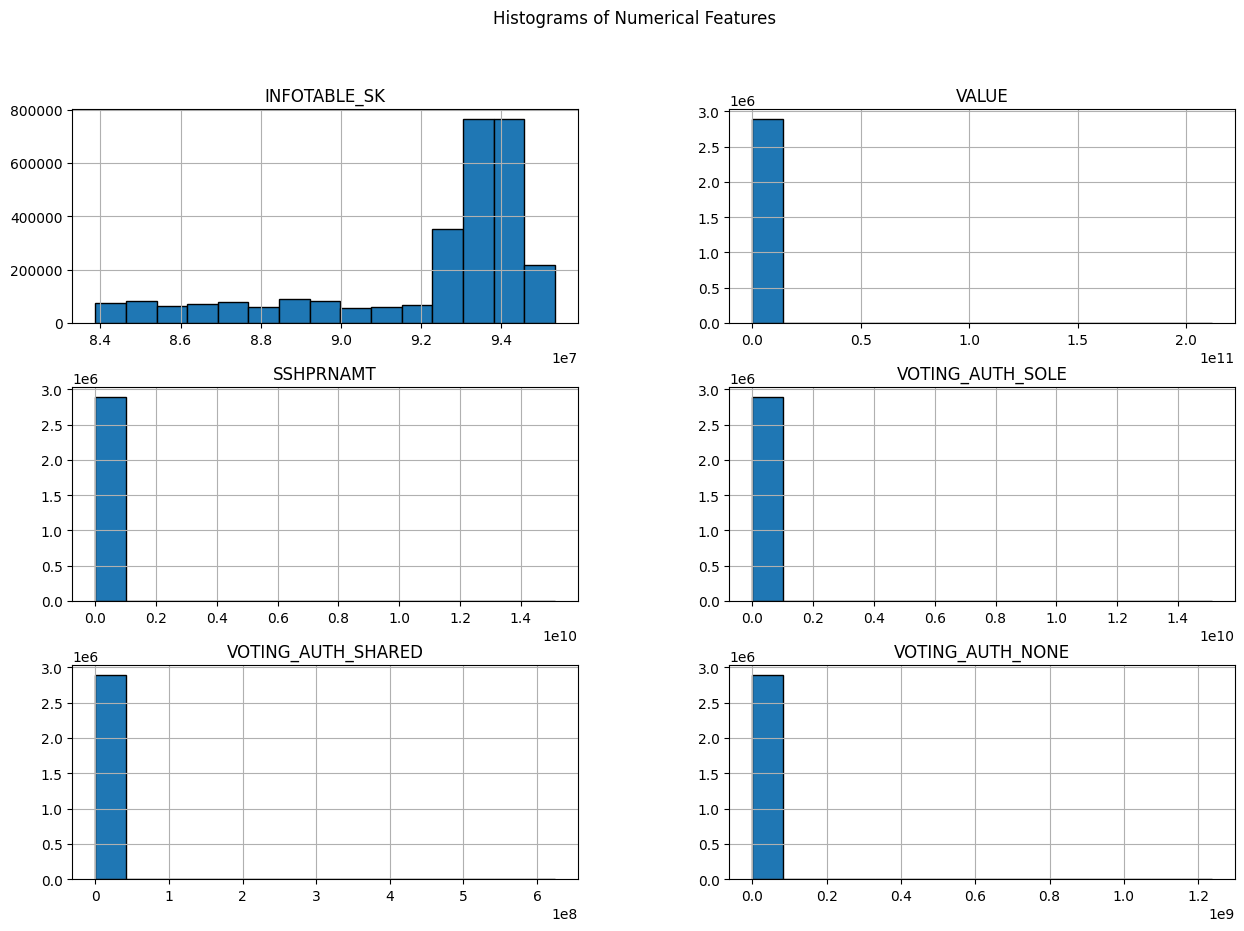

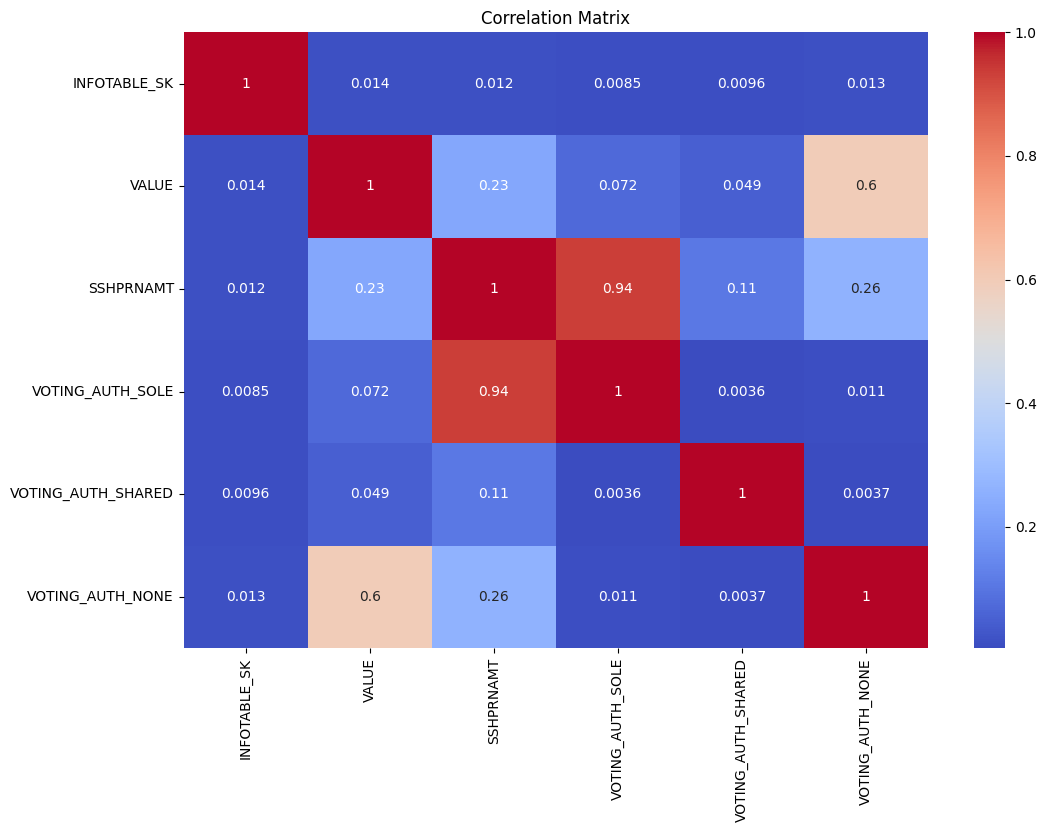

In [4]:
# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", data[col].value_counts())

# Histograms for each feature
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation plot (numerical columns only)
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

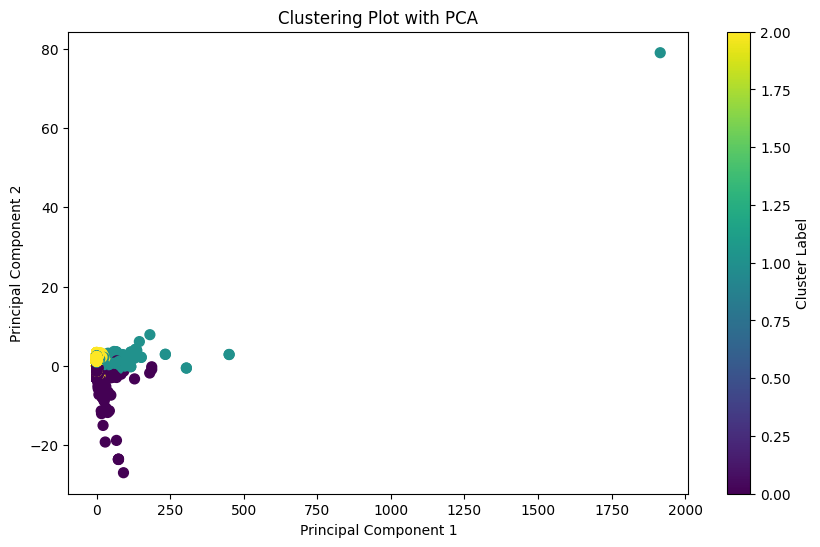

In [7]:
# Handle mixed types in categorical columns by converting to string type
for col in categorical_cols:
    data[col] = data[col].astype(str)
    data[col] = LabelEncoder().fit_transform(data[col])

# Standardize the data (only numerical columns) for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Clustering with KMeans
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_data)

# Plot clustering results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clustering Plot with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()